## NLP and Deep Learning For Fake News Classification in Python
### Project Overview
What is Fake News?

The purposeful presenting of (usually) incorrect or misleading statements as news, where the assertions are deceptive by design, is known as fake news.

How did digital media and news evolve?

Newspapers, tabloids, and magazines gave way to digital news platforms, blogs, social media feeds, and a plethora of news mobile apps. News organizations profited from the increasing usage of social media and mobile platforms by offering their subscribers up-to-date news almost instantly.
Customers can now more easily obtain the most recent news at their fingertips. Therefore, the ease with which these digital media platforms can be accessed by everyone and their capacity to facilitate user discussion and idea sharing as well as debate about topics like such as democracy, education, health, research and history.

Apart from this benefit, however, false or fake news pieces are becoming more and more prevalent on digital platforms. They are primarily used negatively for their own gain, including financial and political gain, the creation of prejudiced attitudes, the manipulation of mindsets, and the dissemination of ridiculousness.

How big is the problem?

Anyone can disseminate false and biased information due to the quick uptake of the Internet, social media, and digital platforms (like Facebook, Twitter, news portals, or other social media). It is difficult to stop the creation of fake news. The past ten years have seen a sharp rise in the dissemination of fake news, which now affects a wide range of topics including politics, sports, health, history, entertainment, and science and research. Consider the 2016 US presidential election, which was heavily influenced by the publication of false and slanted news. Another example would be COVID-19. Every day, we typically encounter a lot of false or misleading information that could have major repercussions, incite panic among the populace, and hasten the spread of the epidemic.

As a result, it's critical to recognize and distinguish between fake and legitimate news. One approach is to assess each piece of news by an expert and fact-checker, but this takes time and involves expertise that is not transferable. Second, by utilizing machine learning and artificial intelligence tools, we can automate the detection of fake news. While there are many different unstructured format data types (such documents, films, and audios) in online news material, we will focus on text format news here. Natural language processing has advanced to the point where we can now recognize when an article or statement is false or misleading.

The goal of this field's extensive research and experimentation is to identify fake news across all media (text, audio, and video).

Description of Data

In my study, I employed the Kaggle Fake News dataset to apply the Deep Learning Technique Sequence to Sequence programming to identify news stories that lacked credibility as fake news.

A full training dataset with the following attributes

id : unique id for a news article
title: the title of a news article
author: author of the news article
text : the text of the article; could be incomplete
label : a label that marks the article as potentially unreliable
1 : unreliable
0 : reliable

Tech Stack

Language : Python
Libraries : Scikit-learn , Tensorflow , Keras, Glove, Flask, nltk, pandas, numpy




### Download the data source
https://www.kaggle.com/c/fake-news/data

In [1]:
### Import all library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import keras
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-11-15 09:44:15.310310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

def read_data(filename,**kwargs):
    raw_data=pd.read_csv(filename,**kwargs)
    return raw_data

In [3]:
# Setup Directory Path

root_dir = str(Path().resolve().parent)
input_dir = root_dir+"/input/"
output_dir = root_dir+"/output/"
model_dir = root_dir+"/model/"
image_dir = 'images/'
print(root_dir)

/Users


### Data Understanding

In [4]:
# READ DATASET

news_df= read_data('/Users/hp/Downloads/train.csv')
submit_test = read_data('/Users/hp/Downloads/test.csv')
submit_label = read_data('/Users/hp/Downloads/submit.csv')
submit_test['label'] = submit_label.label
print(" Shape of News data :: ", news_df.shape)
print(" News data columns", news_df.columns)
print(" Test columns", submit_test.columns)
news_df.head()

 Shape of News data ::  (20800, 5)
 News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
 Test columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [5]:
submit_test.head()

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                      NaN  Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

   label  
0      0  
1      1  
2      0  
3      1  
4      1

### Note : There no label for test dataset., So we will use train set for training and validation after split.

In [6]:
#Text Word startistics: min.mean, max and interquartile range

text_len = news_df.text.str.split().str.len()
text_len.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [7]:
#Title statistics 

title_len = news_df.title.str.split().str.len()
title_len.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

The statistic of Train and Test datasets are following: 
1. Attribute **text** having more words count with average of 760 words and 75% are less than 1000 word.
2. Attribute **title** are small sentence with average of 12 words and 75% are less than 15 only.

From following columns ['id', 'title', 'author', 'text', 'label'] we will not include id and author.

**Our experiment would be with both text and title together**

####  Count plot for both labels are


/Users/hp/opt/anaconda3/envs/Keras/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hp/opt/anaconda3/envs/Keras/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hp/opt/anaconda3/envs/Keras/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


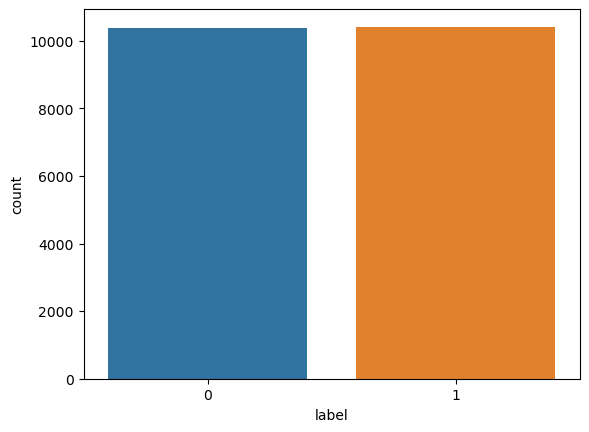

In [8]:
sns.countplot(x="label", data=news_df);
plt.show()

## Approach :  Sequence Problem Neural Network

### Sequence Problem
- Sequences is a predictive modelling problem, in which you have a certain sequence of entries, and the task is to predict the next sequence. The input and output sequence could vary one to many sequence. The difficulty of this problem lies in the fact that sequences can vary in length. 
- Example of sequence problem:
    - Text classification, snetimenent analysis: Where text are sequence of word, which could be long sentence
    - Timeseries prediction: Stock, financial prediction
    - Music generation
    - Question Answering, Language modeling, Neural machine translation
    - etc.
    

- Types of Sequence Problem
    1. One-to-One: Where there is one input and one output. Typical example of a one-to-one sequence problems is the case where you have an image and you want to predict a single label for the image.
    
    2. Many-to-One: In many-to-one sequence problems, we have a sequence of data as input and we have to predict a single output. Text classification is sequence problems where we have an input sequence of words and we want to predict a single output tag.
    
    3. One-to-Many: In one-to-many sequence problems, we have single input and a sequence of outputs. A typical example is an image and its corresponding description.
    
    4. Many-to-Many: Many-to-many sequence problems involve a sequence input and a sequence output. For instance, stock prices of 7 days as input and stock prices of next 7 days as outputs. 

**Note: Challenge is to handle large input and output sequence.**
    
### Simple RNN, LSTM and GRU

### RNN :  Recurrent Neural Network

Recurrent Neural Networks (RNN) are designed to work with sequential data. RNN uses the previous information in the sequence to produce the current output. To understand this better takes an example sentence.

#### Note:
2. RNN weights and bias for all the nodes in the layer are same.
3. In case of more steps it suffers from vanishing gradient more than other neural network architectures.

### LSTM: Long Short Time Memory

An LSTM has a similar control flow as a recurrent neural network but the differences are the operations within the LSTM’s cells that it propogates long sequence information. It solve the problem of short-term memory and vanishing gradients. It is more accurate when using datasets with long sequence.

- LSTMs have three types of gates: input gates, forget gates, and output gates that control the flow of information.
- The hidden layer output of LSTM includes the hidden state and the memory cell. Only the hidden state is passed into the output layer. The memory cell is entirely internal.
- Cell state captures both short-term and long-term dependencies in sequences.

### GRU: Gated Recurrent Units
This is a type of recurrent Neural Network (RNN) that in certain cases, has advantages over LSTM. It uses less memory and is faster than LSTM

### Steps to Build Many to One Sequence Problem for Text
1. Clean Datasets: remove unused rows and columns, imput null etc
2. Preprocessing: NLTK processing, 
3. Data Preperation
    - Vectorization, Sequence data preperation, Padding to have equal sequence length
4. Sequence representation: 
    - Onehot ecoding, Word embedding etc
5. Build Emedding Layer
6. Build Neural Network model
7. Compile and fit model
8. Hyperparamter tunning
9. Model Performance

### Clean Datasets: 
   - Drop unused row and columns
   - Null value imputation
   - Remove special characters
   - Remove stop words

In [9]:
## Constants Used for cleaning the datasets

column_names = ['id', 'title', 'author', 'text', 'label']
remove_columns = ['id','author']
categorical_features = []
target_col = ['label']
text_features = ['title', 'text']


In [10]:
## Clean Datasets

import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
#nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused clumns
def remove_unused_columns(df,column_names=remove_columns):
    df = df.drop(column_names,axis=1)
    return df

# Impute null values with None
def null_processing(feature_df):
    for col in text_features:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_datasets(df):
    # remove unused column
    df = remove_unused_columns(df)
    #impute null values
    df = null_processing(df)
    return df

## Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words,
# Stemming and
# Lemmetization
# For our project we use only Stop word removal
def nltk_preprocesing(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text


df = clean_datasets(news_df)
df_test = clean_datasets(submit_test)

df["text"] = df.text.apply(nltk_preprocesing)
df_test["text"] = df_test.text.apply(nltk_preprocesing)

df["title"] = df.title.apply(nltk_preprocesing)
df_test["title"] = df_test.title.apply(nltk_preprocesing)

[nltk_data] Error loading wordnet: <urlopen error [Errno 60] Operation
[nltk_data]     timed out>


In [11]:
df.head()

title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  
0  house dem aide didnt even see comeys letter ja...      1  
1  ever get feeling life circle roundabout rather...      0  
2  truth might get fired october 29 2016 tension ...      1  
3  video 15 civilian killed single u airstrike id...      1  
4  print iranian woman sentenced six year prison ...      1

## Explorative Data Analysis
- Univariate Analysis: Statistical Analysis of Text, Word cloud
- Bivariate Analysis : Bigram and Trigram
### Single word word cloud
Most frequent word appear with Bold and bigger font.
#### Word cloud for all word in datasets

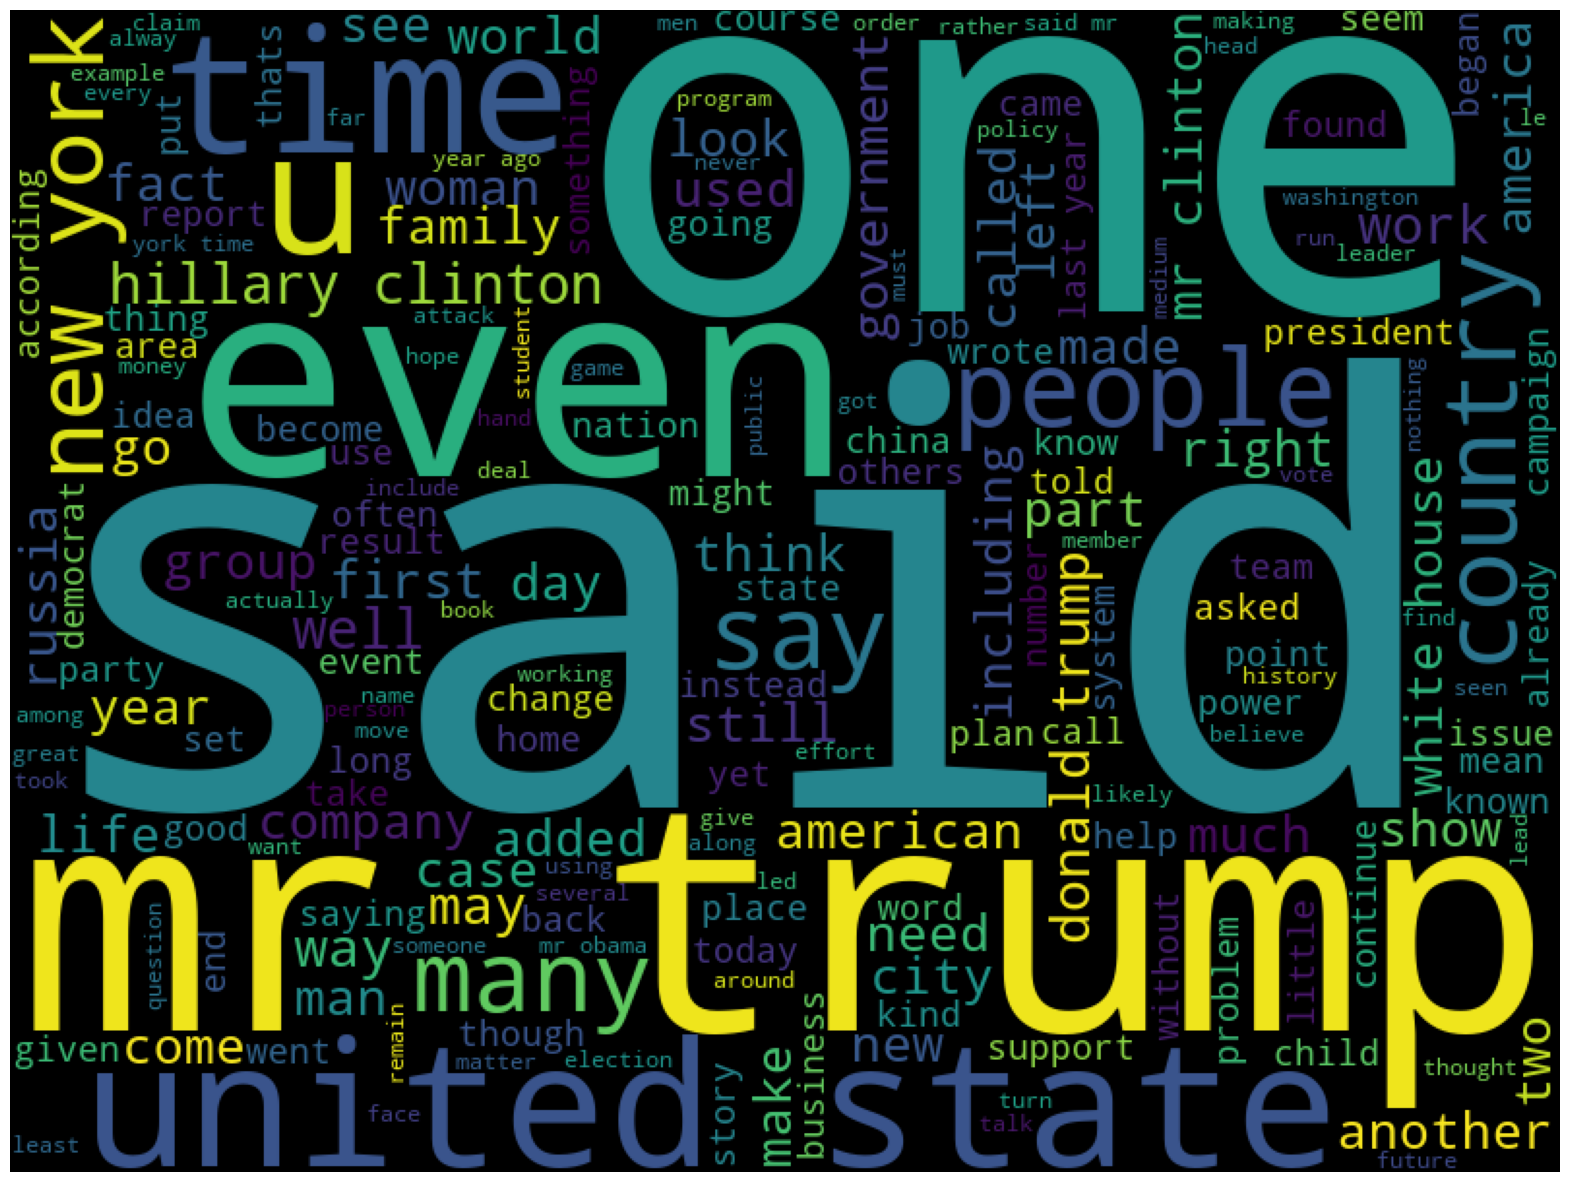

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( background_color='black', width=800, height=600)

text_cloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

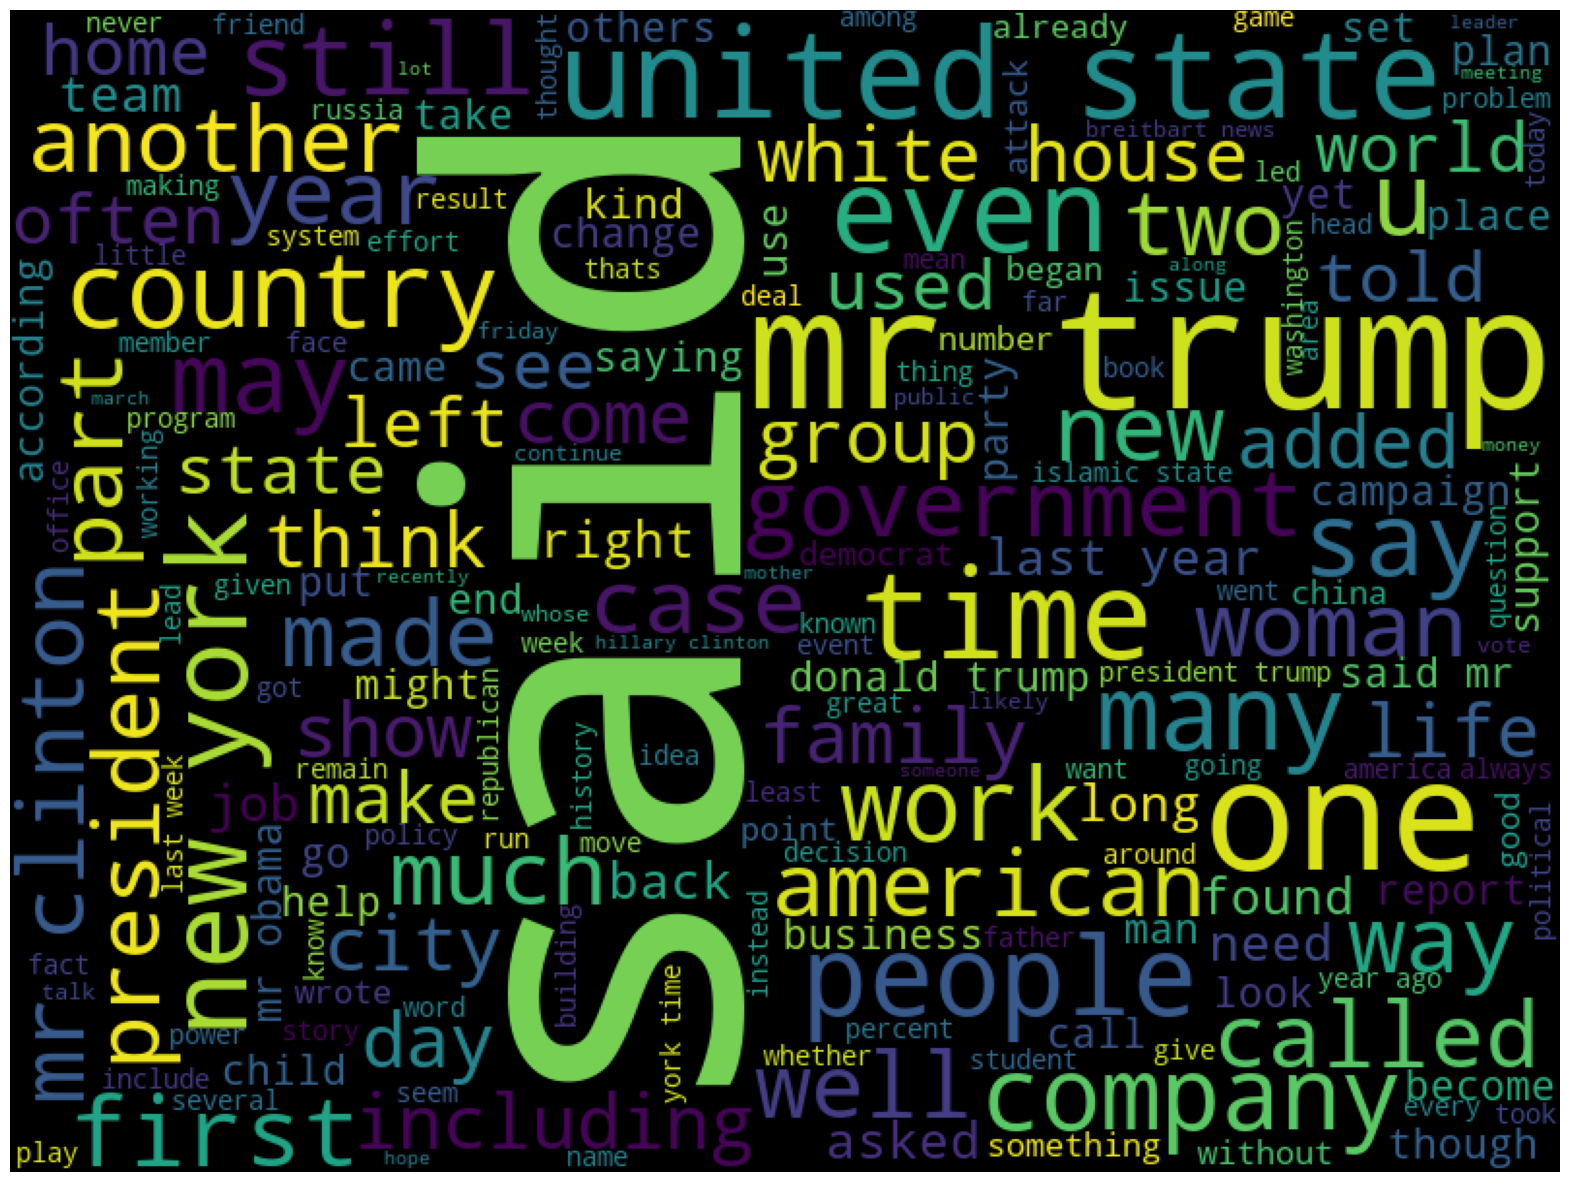

In [13]:
### Word cloud for True label news only
true_news = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

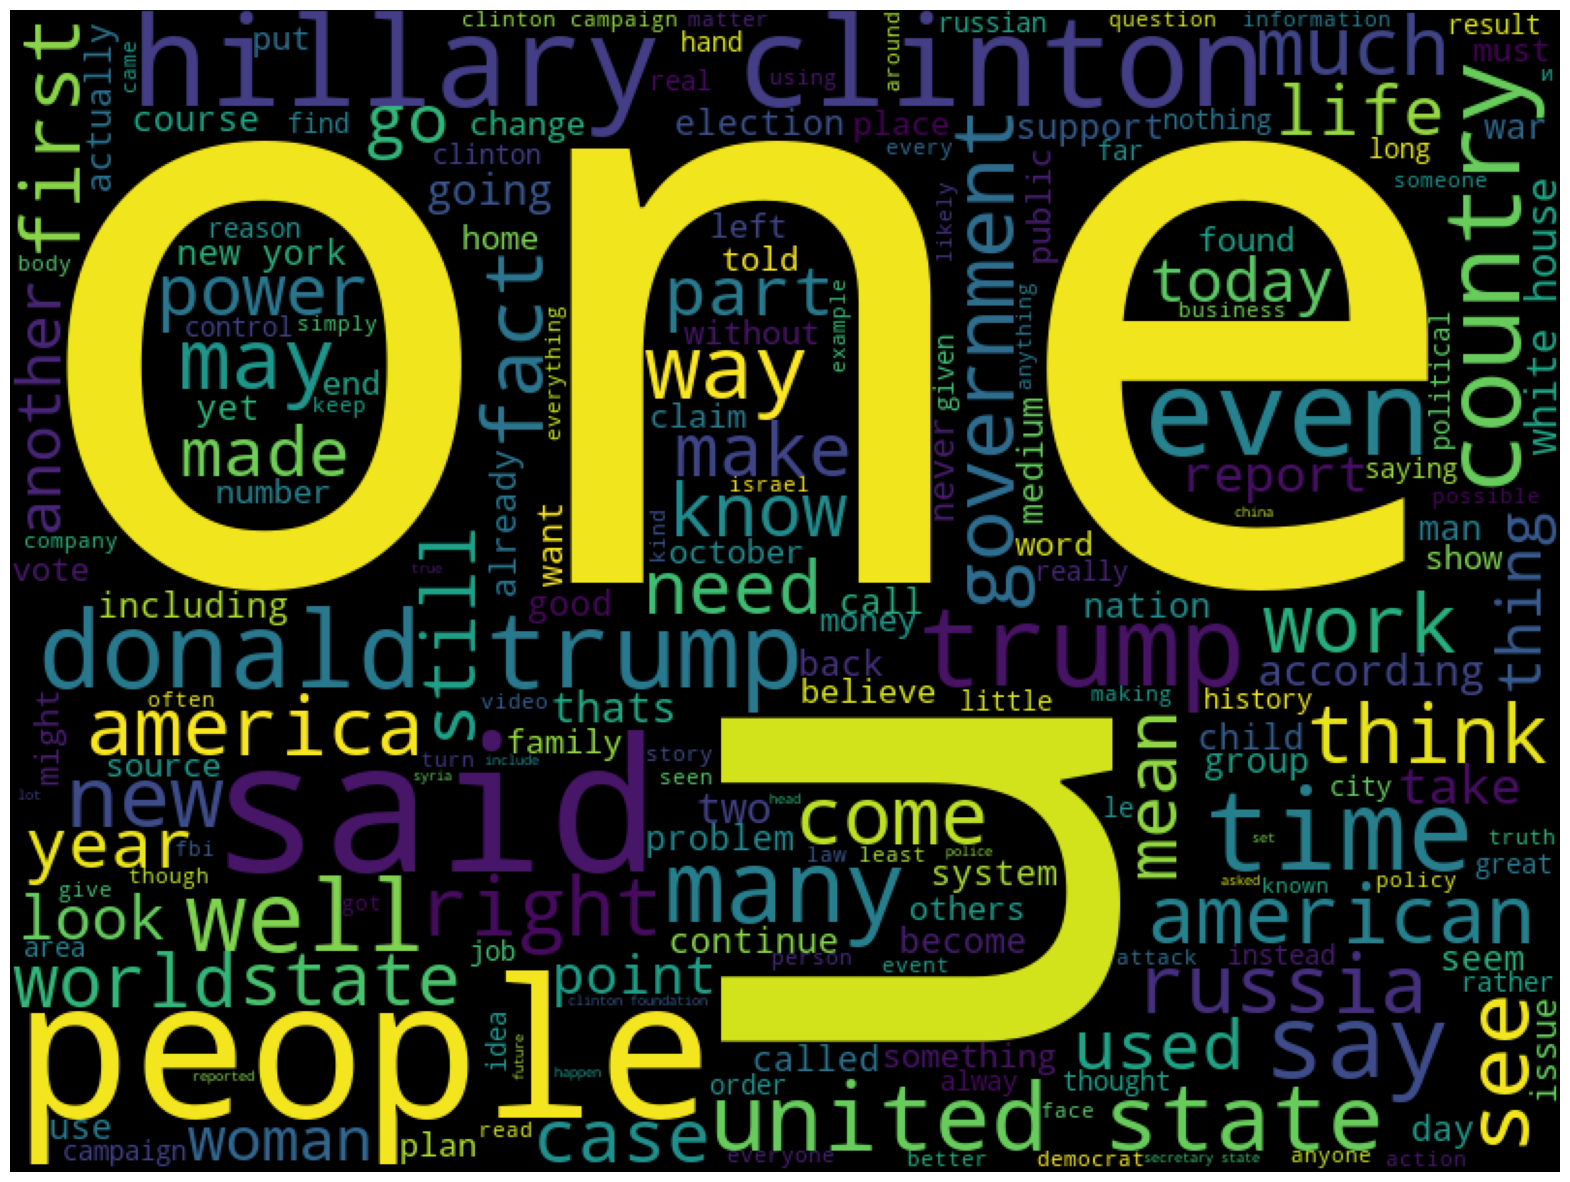

In [14]:
### Word cloud for Fake label news only
fake_news = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()


### N-Gram

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. 


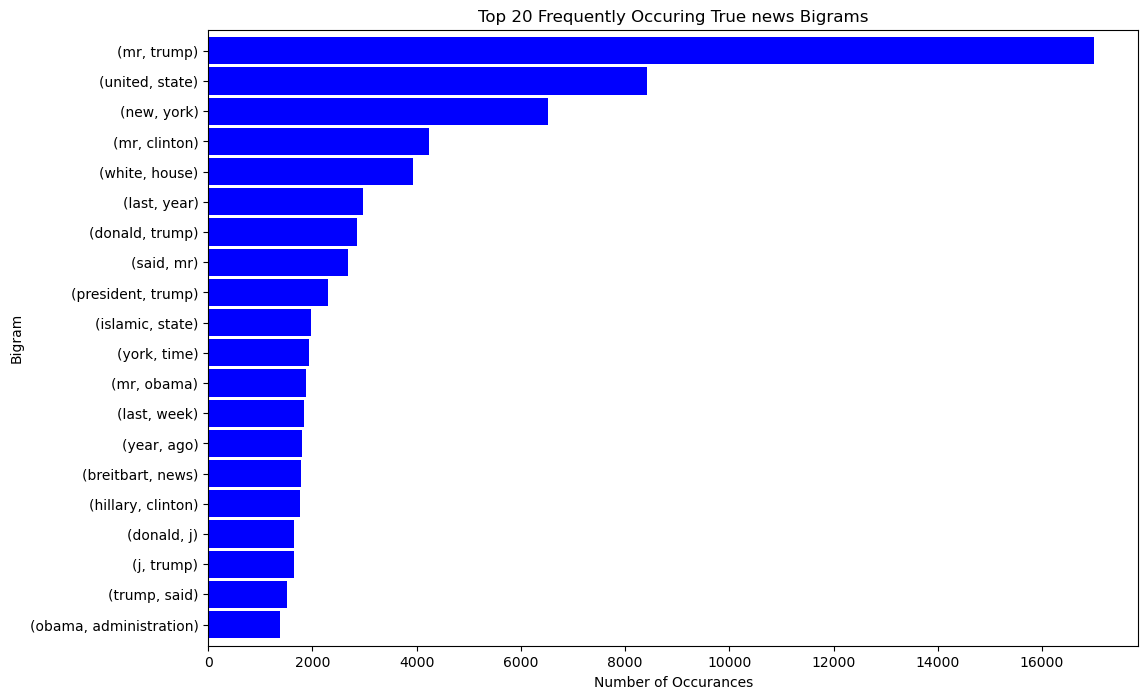

In [15]:
### Most frequent Bigram(Two word combination) of True label
true_bigrams = (pd.Series(nltk.ngrams(true_news.split(), 2)).value_counts())[:20]
true_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show()

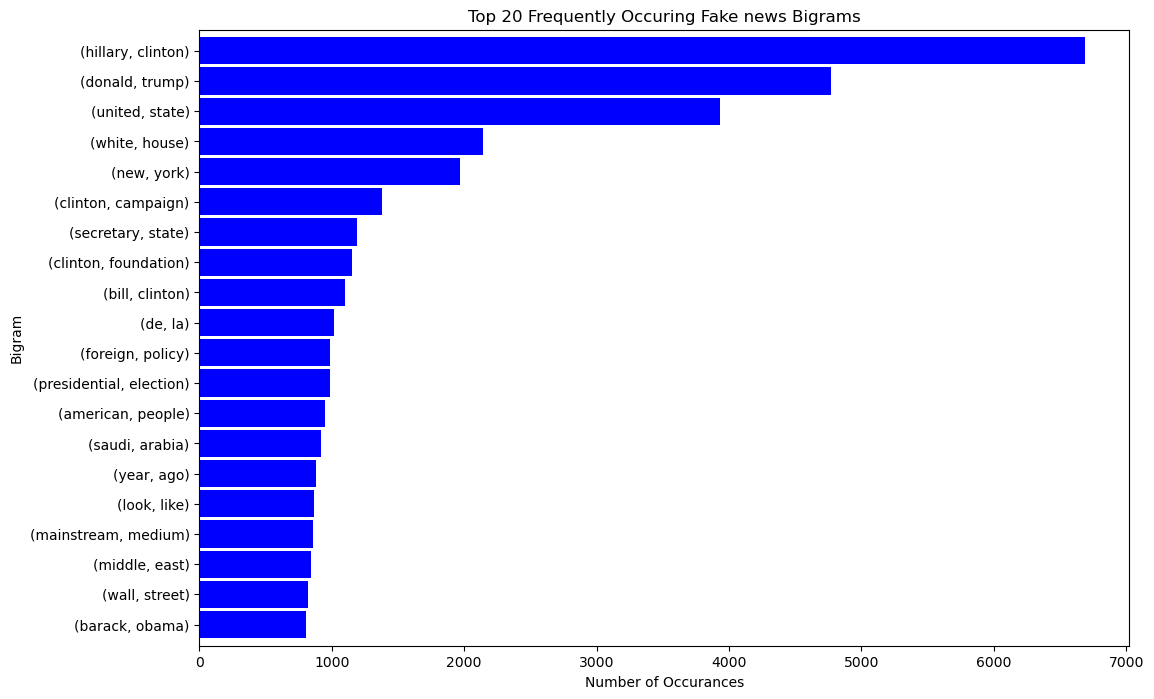

In [16]:
### Most frequent Bigram(Two word combination) of Fake label
fake_bigrams = (pd.Series(nltk.ngrams(fake_news.split(), 2)).value_counts())[:20]
fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')
plt.show()

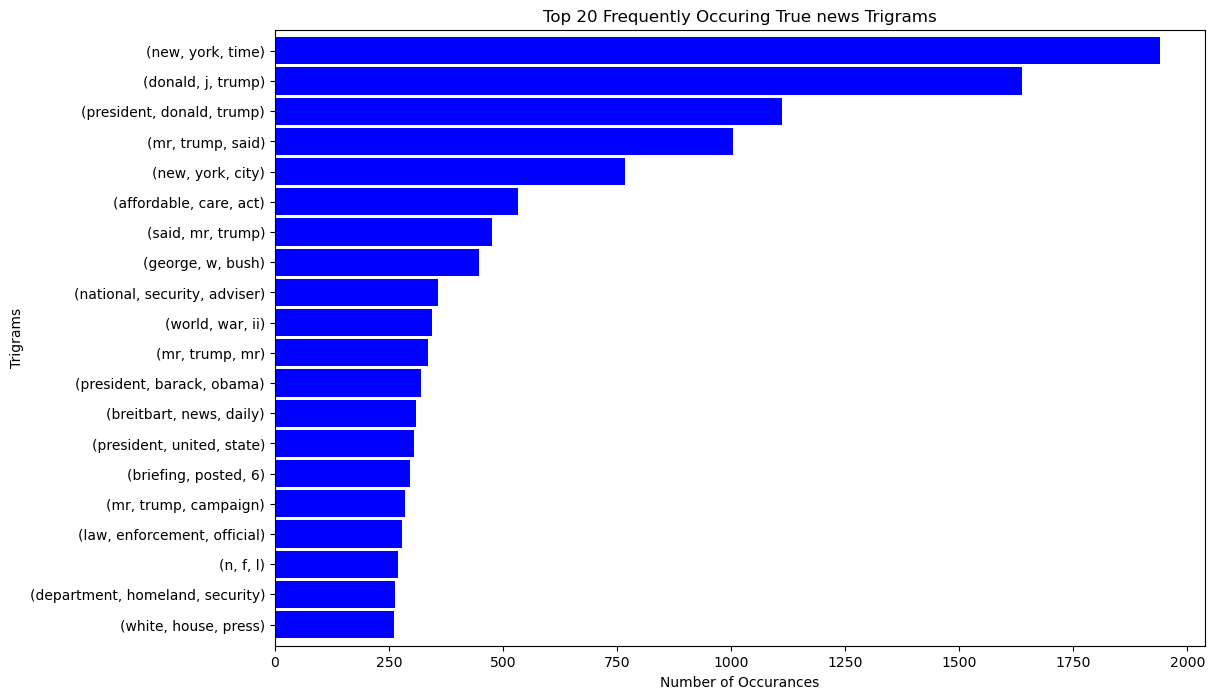

In [17]:
### Most frequent Trigram(Three word combination) of True label
true_bigrams = (pd.Series(nltk.ngrams(true_news.split(), 3)).value_counts())[:20]
true_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring True news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show()

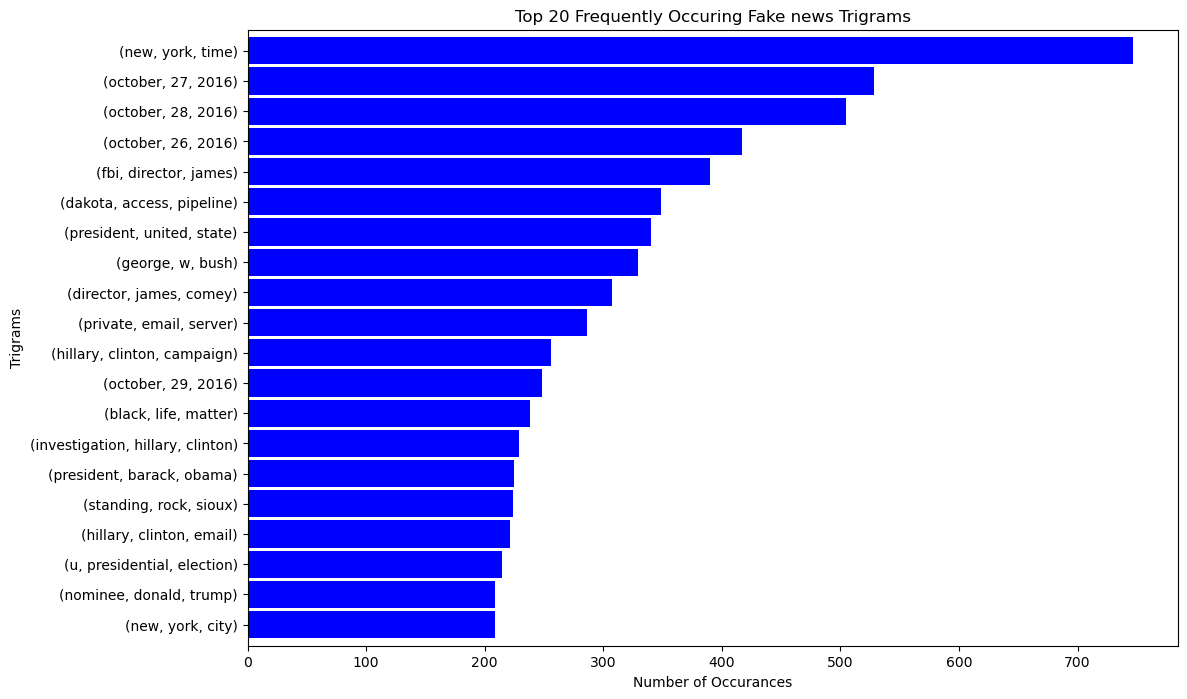

In [18]:
### Most frequent Trigram(Three word combination) of Fake label
fake_bigrams = (pd.Series(nltk.ngrams(fake_news.split(), 3)).value_counts())[:20]
fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 20 Frequently Occuring Fake news Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Number of Occurances')
plt.show()

We will include all words to train our model
### Splitting training dataset into train and test for model selection and validation
   - Merge all Text Feature
   - Split datasets in Train, Test 


In [19]:
## Merge Text features together
def merge_text_features(df, text_featuers = text_features):
    df['news']=df[text_featuers].agg(' '.join, axis=1)
    print("Merge news text statistics::\n ",df.news.str.split().str.len().describe())
    return df

## Preperaing Datasets
def preparing_datasets(df):
    XY = merge_text_features(df)
    #XY["news"] = XY.news.apply(clean_text)    
    print(" Cleaning as remove special character is done..")
    print(XY.head())
    #XY["news"] = XY.news.apply(nltk_preprocesing)
    X = XY['news']
    y = XY.label
    print("Text len statistic after Merge news and preprocessing::\n ",X.str.split().str.len().describe())
    if  y.dtype=='object':
        y= process_labels(y)
    return X,y

In [20]:

## preprocessing datasets
print(" Training data preprocessing ")
X,y = preparing_datasets(df)

print(" Test data preprocessing ")
X_test,y_test = preparing_datasets(df_test)


 Training data preprocessing 
Merge news text statistics::
  count    20800.000000
mean       440.236490
std        490.971666
min          1.000000
25%        166.000000
50%        331.000000
75%        602.000000
max      20731.000000
Name: news, dtype: float64
 Cleaning as remove special character is done..
                                               title  \
0  house dem aide didnt even see comeys letter ja...   
1   flynn hillary clinton big woman campus breitbart   
2                              truth might get fired   
3   15 civilian killed single u airstrike identified   
4  iranian woman jailed fictional unpublished sto...   

                                                text  label  \
0  house dem aide didnt even see comeys letter ja...      1   
1  ever get feeling life circle roundabout rather...      0   
2  truth might get fired october 29 2016 tension ...      1   
3  video 15 civilian killed single u airstrike id...      1   
4  print iranian woman sentenced six

**Here it is observed that mean number word for each news record is 449 and 75% quartile words length is 619 only. 
So based on this statistic, we can fix our word sequence using any suitable size for all news length as equal size.**



## Data Preperation
### Sequence Data Transformation :
   - Tokenization
   - Text sequence generation
   - Pad the text sequence data
### Text Tokenization
Keras tokenizer to convert each text into a sequence of words, and then create the vocabulary using method on the tokenizer.

In [21]:
## Split datasets into train test sets to evalute mode with test size: 20%
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train,y_train = X,y
print("Train data counts::",X_train.shape)
print("Test data counts::",X_test.shape)

oov_token = "<OOV>" # it will be added to word_index and used to replace
                    #out-of-vocabulary words during text_to_sequence calls
vocab_size = 100000 #the maximum number of words to keep, based
                    #on word frequency
    
#tokenizer = Tokenizer(oov_token=oov_token)
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
text = X_train#['text']
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index
print("Word Index ")
print(len(word_index.keys()))

max_text_length = 100
#vocab_size = len(word_index)

Train data counts:: (20800,)
Test data counts:: (5200,)
Word Index 
201482


In [22]:

def prepare_seqence_data(df,tokenizer):
    # Transforms each text in texts to a sequence of integers.
    # Create Sequence
    print(" Create Sequence of tokens ")
    text_sequences = tokenizer.texts_to_sequences(df)

#     # Missing words in Glove vectors
#     words_used = [tokenizer.index_word[i] for i in range(1, vocab_size)]
#     missing_words = set(words_used) - set(word_vec.index.values)
#     print(len(missing_words))
#     missing_word_index = [tokenizer.word_index[word] for word in missing_words]
    
#     # Deleting above missing words
#     text_sequences = [[word for word in sentence if word not in missing_word_index] for sentence in text_sequences]
    print("Text to sequence of Id:: ", text_sequences[0:1])
    return text_sequences


### Padding
Padding used to make length of sequence equal for all input

In [23]:
padding_type = "post" # Type of padding pre or post of input sequence
trunction_type="post" # Type of truncation used to truncate input sequence if exceed from maximum sequence length

def pad_sequence_data(text_sequences,max_text_length):
    # Pad the Sequences, because the sequences are not of the same length,
    # so let’s pad them to make them of similar length
    text_padded = pad_sequences(text_sequences, maxlen=max_text_length, padding=padding_type,
                                          truncating=trunction_type)
    return text_padded

In [24]:
train_text_seq = prepare_seqence_data(X_train,tokenizer)
test_text_seq = prepare_seqence_data(X_test,tokenizer)

train_text_padded = pad_sequence_data(train_text_seq,max_text_length)
test_text_padded = pad_sequence_data(test_text_seq,max_text_length)

print("Padded Sequence :: ", test_text_padded[0:1])

print(" Tokenizer detail :: ", tokenizer.document_count)
print('Vocabulary size:', len(tokenizer.word_counts))
print('Shape of data padded:', train_text_padded.shape)

 Create Sequence of tokens 
Text to sequence of Id::  [[41, 4596, 929, 262, 20, 63, 2247, 542, 2686, 6401, 2707, 41, 4596, 929, 262, 20, 63, 2247, 542, 2686, 6401, 2707, 11198, 22889, 297, 560, 78, 2927, 2686, 6401, 9271, 17, 11110, 3675, 576, 4143, 635, 1, 892, 2474, 1, 2123, 3737, 5166, 32565, 1100, 1417, 308, 27, 1, 204, 650, 507, 87, 41, 190, 929, 134, 14, 16, 40, 1, 308, 60, 393, 507, 541, 48798, 542, 3726, 179, 547, 69, 39, 984, 28, 13, 69, 1118, 4422, 141, 2904, 356, 262, 1063, 507, 133, 1026, 1382, 5, 47, 356, 753, 40, 507, 6517, 47, 753, 190, 4422, 101, 41, 388, 3676, 3764, 356, 245, 4985, 69, 452, 1359, 153, 63, 3026, 1472, 183, 113, 542, 304, 3764, 356, 753, 2686, 6401, 226, 67, 27, 17382, 1382, 179, 19067, 2468, 179, 1186, 2187, 69, 1068, 6729, 166, 82, 4366, 2686, 6401, 31076, 297, 1132, 78, 315, 40, 82, 507, 339, 233, 4985, 69, 616, 6314, 1, 40, 1826, 4033, 6852, 2681, 1328, 185, 66, 158, 262, 254, 6401, 3675, 47, 188, 3189, 8938, 11941, 166, 28, 1, 196, 26, 11, 1036, 163

## Feature Engineering
### Text Encoding : Vectorization
- One Hot encoding
- count vector, eg: TFIDF
- Word embedding
    - Word2Vec
    - GLOVE
    - FASTEXT
    - etc
    
**In this section we will use GLOVE to convert text into numeric vector representation**

## Word Embedding
- Word embdding take care of word representation 
- Word embedding algorithms can figure out tons of relationships from the text data. They use the idea of context and learn by seeing what word occurs near other words. It can represent words with fixed number of dimension instead of One-hot or count reprsentation with huge number of vocablury size.


In [25]:
## Constants for Word Embeddings
## Embedding Parameters ###

import os
emb_dim = 100
embedding_type = 'glove'
root_dir = '/Users/hp/Downloads/glove'
glove_file = os.path.join(root_dir, f"glove.6B.{emb_dim}d.txt")
vocab_size = len(word_index) + 1

In [26]:
##### Create Glove Word Embedding #########
#### Download glove if not exist ########
import csv
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

def read_glove_embeddings():
    try:
        with open(glove_file, 'r', encoding='iso-8859-1', errors='replace') as file:
            lines = file.readlines()
            word_vec_list = []
            for line_num, line in enumerate(lines):
                try:
                    fields = line.split()
                    if len(fields) == emb_dim + 1:
                        word_vec_list.append(fields)
                except Exception as e:
                    print(f"Error parsing line {line_num + 1}: {e}")

            word_vec = pd.DataFrame(word_vec_list)
            word_vec.set_index(0, inplace=True)
            print('Found %s word vectors.' % len(word_vec))
            return word_vec
    except (FileNotFoundError, pd.errors.ParserError) as e:
        print(f"Error reading glove file: {e}")
        return None

# Glove embedding using tokenizer for word index, vocab size
def glove_embeddings(tokenizer):
    embeddings_index = read_glove_embeddings()
    
    if embeddings_index is None:
        return None

    embedding_matrix = np.zeros((vocab_size, emb_dim))

    index_n_word = [(i, tokenizer.index_word[i]) for i in range(1, len(embedding_matrix)) if
                    tokenizer.index_word[i] in embeddings_index.index]
    idx, word = zip(*index_n_word)
    embedding_matrix[idx, :] = embeddings_index.loc[word, :].values

    return embedding_matrix

def onehot_embedding(tokenizer):
    onehot_vec = [one_hot(words, (len(tokenizer.word_counts) + 1)) for words in tokenizer.word_index.keys()]
    embedded_docs = pad_sequences(onehot_vec, padding='pre', maxlen=max_text_length)
    return embedded_docs

def build_embeddings(tokenizer):
    vocab_len = vocab_size
    print(" vocab_len ", vocab_size)
    
    if embedding_type == 'glove':
        embedding_matrix = glove_embeddings(tokenizer)
        if embedding_matrix is None:
            print("Error: Unable to load glove embeddings.")
            return None
        print(" Encoded word sequence:: ", embedding_matrix[0:10])
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   weights=[embedding_matrix], trainable=False)
        return embeddingLayer
    elif embedding_type == 'fasttext':
        embedding_matrix = fasttext_embeddings()
        if embedding_matrix is None:
            print("Error: Unable to load fasttext embeddings.")
            return None
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   weights=[embedding_matrix], trainable=False)
        return embeddingLayer
    else:
        embedding_matrix = onehot_embeddings(tokenizer)
        embeddingLayer = Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=max_text_length,
                                   trainable=False)
        return embeddingLayer


In [27]:
embedding_layer = build_embeddings(tokenizer)

 vocab_len  201483
Found 399883 word vectors.
 Encoded word sequence::  [[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0

## Building Sequence Model
### Approach:
1. Recurrent Neural Network: Simple RNN
2. Long Short Time Memory
3. GRU
### Steps to build Sequence Network

1. Input Layer
    - In Text case input woud be sequence of word index
    - (Max_sequence_length,number_training_size) 
    
2. Embedding Layer
    - This layer convert each word index into vector representation of size(50,100,200,300)
    - This could be One-hot or pre-trained(glove or fastext) or trainiable word2Vec(example: using gensim)
    - One-hot would represent each word to size of vocabulary size
    - In this experiment we used pre-trained model: glove with 50 and 100 dimension vector.
    - embedding layer input: Input
    - Output: (training_size,Max_sequence_length,embedding_dimension ) 
    
3. Hidden layer: RNN/LSTM/GRU
    - input: embedding output
    - output: (training_size,no_of_nurons)    
    
4. Stacked Layer: Multiple layer of RNN/LSTM/GRU can be repeated
    - Stack layer need to return the same sequence from previous layer
    - return_sequence = True
    - because RNN/LSTM/GRU need the same sequence of input  
    
    - collect final context output from Sequence layer
    - Activation function: Relu    
    
6. Dropout/Batchnormalization after hidden layer if rquire, which is regularization technique to avoid over-fitting/vanishing gradiant. 
    
7. Multiple Dense layer if require
    
8. Output Layer: 
    - Sigmoid: Activation function for binary class

### Parameter to Tune
- Vocabulary length
- max sequence length
- Embedding size: 50/100/200/300
- Neural Network: RNN/GRU/LSTM
- No of Sequence layer 
- No.of Dense Hidden Layers
- Dropout
- Hidden layer dimension
- No. of Epochs
- Batch size
    

In [28]:
## Params
sequence_neuron_size = 100
hidden_layer_1 = 32
epochs = 20
batch_size = 256
classifier = 'binary'

### Build Recurrent Neural Network

In [29]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GRU, SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import date
import os
import matplotlib.pyplot as plt
from os.path import exists
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


#Building Sequential network with
#   Embeding Layer
#   LSTM
#   Dense
#   Output Layer
def build_network_lstm(embedding_layer, lstm_size):
    
    print(" Building Sequential network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(sequence_neuron_size))#, return_sequences=True))
    #model.add(LSTM(100))    
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_network_GRU(embedding_layer):

    print(" Building GRU network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(GRU(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_network_RNN(embedding_layer):

    print(" Building RNN network ")
    model = Sequential()
    model.add(embedding_layer)
    model.add(SimpleRNN(sequence_neuron_size))#, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(hidden_layer_1, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

def train_model(model,X_train,y_train,X_test, y_test):
    
    # Compile Model with loss function, 
    # optimizer and metricecs as minimum parameter
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    # Train model with Train and test set data
    # Number of epochs, batch size as minimum parameter
    history = model.fit(X_train, y_train, epochs=epochs,batch_size = batch_size ,validation_split=0.2)#validation_data=(X_test, y_test))   
    return model,history

def performance_history(history, model_type, name, directory_path):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    # Save the plot
    save_path = os.path.join(directory_path, f'Model_20-256-100-201483-_performance.jpeg')
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path)
    
    # Display the plot
    plt.show() 

def model_evaluation(model,X_test,y_test):
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score

def store_model(model, model_type, name, directory_path=None):
    # Existing code

    # Add the following condition to check if directory_path is provided
    if directory_path:
        save_path = os.path.join(directory_path, f'Model_{model_type}_{name}.h5')
    else:
        save_path = f'Model_{model_type}_{name}.h5'
    
    model.save(save_path)
    print(f'Model \'{model_type}_{name}\' saved at: {save_path}')


    
def performance_report(model,testX,testy):

    time = date.today()
 
    yhat_probs = model.predict(testX, verbose=0)
    yhat_classes = (yhat_probs > 0.5).astype('int32')

    # Now yhat_classes contains your binary predictions

    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]


    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, yhat_classes)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes)
    print('F1 score: %f' % f1)

    if exists(os.path.join(output_dir, 'report.csv')):
        total_cost_df = pd.read_csv(os.path.join(output_dir, 'report.csv'), index_col=0)
    else:
        total_cost_df = pd.DataFrame(
                columns=['time', 'name', 'Precision', 'Recall', 'f1_score', 'accuracy'])

    new_row = pd.DataFrame({'time': [time], 'name': [name], 'Precision': [precision], 'Recall': [recall], 'f1_score': [f1], 'accuracy': [accuracy]})

    # Exclude empty or all-NA columns before concatenation
    total_cost_df = total_cost_df.dropna(axis=1, how='all')
    new_row = new_row.dropna(axis=1, how='all')

    total_cost_df = pd.concat([total_cost_df, new_row], ignore_index=True)
  
    total_cost_df.to_csv(os.path.join(output_dir, 'report.csv'), index=False)

### Training Steps:
- Build Network
- Compile
- Fit model to train
- Hyperparamter Tunning, If required
- Evaluate model with Test set

In [30]:
dash = "-"
name = "Model_"

In [31]:
%%time

## Build Network
model_type='RNN'
epochs = 20
batch_size = 256
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_rnn = build_network_RNN(embedding_layer)

model_rnn,history = train_model(model_rnn,train_text_padded,y_train,test_text_padded, y_test)

 Building RNN network 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          20148300  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,171,665
Trainabl

### Running GRU network

In [32]:
import os

# Specify the path for the output directory
output_dir = '/Users/hp/Output'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)



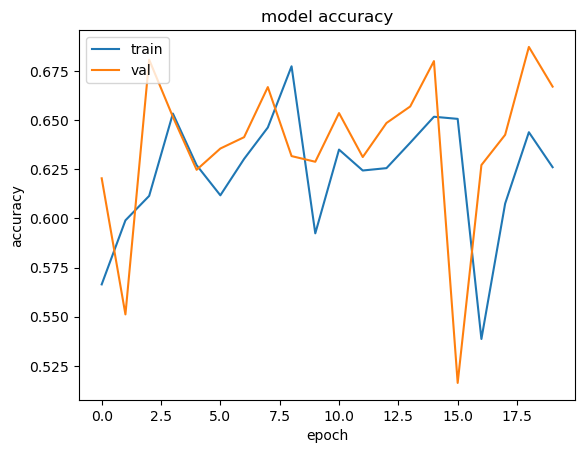

Model 'RNN_Model_20-256-100-201483-' saved at: Model_RNN_Model_20-256-100-201483-.h5
Test loss: 0.6424530744552612 / Test accuracy: 0.5921154022216797
Accuracy: 0.592115
Precision: 0.648833
Recall: 0.563789
F1 score: 0.603329


In [33]:
performance_history(history, model_type, name, '/Users/hp/Downloads/model/images/RNN/')
store_model(model_rnn,model_type,name)
model_evaluation(model_rnn,test_text_padded,y_test)
performance_report(model_rnn,test_text_padded,y_test)


In [34]:
%%time

## Build Network
model_type = 'GRU'
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

model_gru = build_network_GRU(embedding_layer)

model_gru,history_gru = train_model(model_gru,train_text_padded,y_train,test_text_padded, y_test)

 Building GRU network 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          20148300  
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,212,165
Traina

2023-11-15 09:56:16.536622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 09:56:16.537615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 09:56:16.538296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.6115

2023-11-15 09:56:25.458998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 09:56:25.459939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 09:56:25.460591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 10s 128ms/step - loss: 0.6664 - accuracy: 0.6115 - val_loss: 0.5880 - val_accuracy: 0.7031
Epoch 2/20
65/65 [==============================] - 8s 126ms/step - loss: 0.4991 - accuracy: 0.7915 - val_loss: 0.4086 - val_accuracy: 0.8548
Epoch 3/20
65/65 [==============================] - 8s 125ms/step - loss: 0.4120 - accuracy: 0.8561 - val_loss: 0.3444 - val_accuracy: 0.8810
Epoch 4/20
65/65 [==============================] - 8s 128ms/step - loss: 0.3312 - accuracy: 0.8959 - val_loss: 0.2913 - val_accuracy: 0.9036
Epoch 5/20
65/65 [==============================] - 10s 148ms/step - loss: 0.2506 - accuracy: 0.9228 - val_loss: 0.2253 - val_accuracy: 0.9269
Epoch 6/20
65/65 [==============================] - 10s 157ms/step - loss: 0.1855 - accuracy: 0.9391 - val_loss: 0.1850 - val_accuracy: 0.9358
Epoch 7/20
65/65 [==============================] - 9s 136ms/step - loss: 0.1514 - accuracy: 0.9490 - val_loss: 0.1642 - val_accuracy: 0.9435
Epoch 8/20
65/

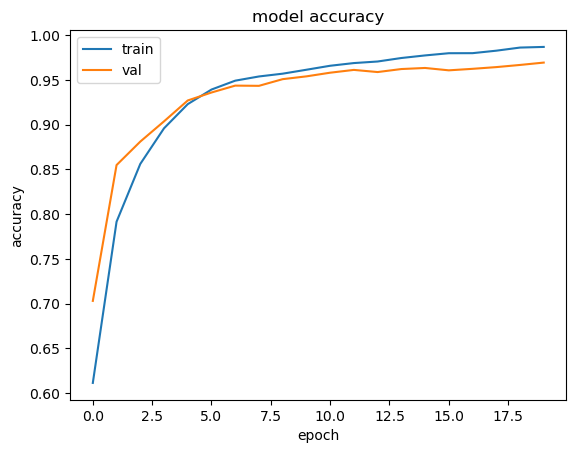

Model 'GRU_Model_20-256-100-201483-' saved at: /Users/hp/Downloads/model/images/GRU/Model_GRU_Model_20-256-100-201483-.h5
Test loss: 2.57953143119812 / Test accuracy: 0.6434615254402161


2023-11-15 09:59:12.287549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 09:59:12.288387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 09:59:12.289108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Accuracy: 0.643462
Precision: 0.690647
Recall: 0.637539
F1 score: 0.663032


In [35]:
model_type = 'GRU'
directory_path = '/Users/hp/Downloads/model/images/GRU'
performance_history(history_gru, model_type, name, directory_path)
store_model(model_gru, model_type, name, directory_path)
model_evaluation(model_gru, test_text_padded, y_test)
performance_report(model_gru, test_text_padded, y_test)


### Running LSTM Network

In [36]:
%%time
model_type = 'LSTM'
lstm_size = 100  
name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(max_text_length)+dash+str(vocab_size)+dash

## Build Network
model_lstm = build_network_lstm(embedding_layer,lstm_size)

model_lstm,history_lstm = train_model(model_lstm,train_text_padded,y_train,test_text_padded, y_test)

 Building Sequential network 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          20148300  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                3232      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,231,965

2023-11-15 09:59:14.390029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 09:59:14.392093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 09:59:14.393856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - ETA: 0s - loss: 0.6094 - accuracy: 0.6887

2023-11-15 09:59:25.025362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 09:59:25.026250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 09:59:25.027112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 12s 166ms/step - loss: 0.6094 - accuracy: 0.6887 - val_loss: 0.6530 - val_accuracy: 0.6262
Epoch 2/20
65/65 [==============================] - 10s 161ms/step - loss: 0.6329 - accuracy: 0.6115 - val_loss: 0.6039 - val_accuracy: 0.6454
Epoch 3/20
65/65 [==============================] - 11s 164ms/step - loss: 0.5915 - accuracy: 0.6838 - val_loss: 0.6248 - val_accuracy: 0.5579
Epoch 4/20
65/65 [==============================] - 11s 165ms/step - loss: 0.6048 - accuracy: 0.6548 - val_loss: 0.5824 - val_accuracy: 0.6647
Epoch 5/20
65/65 [==============================] - 11s 164ms/step - loss: 0.5746 - accuracy: 0.6756 - val_loss: 0.5170 - val_accuracy: 0.7471
Epoch 6/20
65/65 [==============================] - 11s 165ms/step - loss: 0.5775 - accuracy: 0.7090 - val_loss: 0.6357 - val_accuracy: 0.6099
Epoch 7/20
65/65 [==============================] - 11s 165ms/step - loss: 0.6230 - accuracy: 0.6189 - val_loss: 0.6002 - val_accuracy: 0.6577
Epoch 8/20

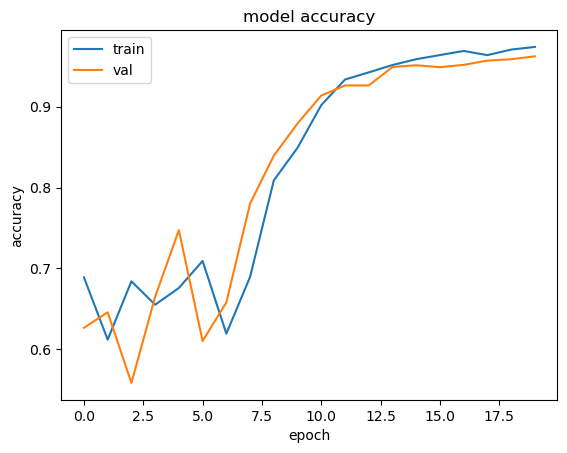

Model 'LSTM_Model_20-256-100-201483-' saved at: Model_LSTM_Model_20-256-100-201483-.h5
Test loss: 1.9377520084381104 / Test accuracy: 0.6376923322677612


2023-11-15 10:02:57.186101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 10:02:57.187323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 10:02:57.188169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Accuracy: 0.637692
Precision: 0.688247
Recall: 0.624257
F1 score: 0.654692


In [37]:
directory_path = '/Users/hp/Downloads/model/images/LSTM'
performance_history(history_lstm,model_type,name, directory_path)
store_model(model_lstm,model_type,name)
model_evaluation(model_lstm,test_text_padded,y_test)
performance_report(model_lstm,test_text_padded,y_test)


### Summary
- In terms of test accuracy, precision, recall, and F1 score, the LSTM model appears to perform the best among the three models, followed closely by the GRU model. The standard RNN model has slightly lower performance across these metrics. 
- The LSTM model achieves the highest accuracy and F1 score among the three models.
- The GRU model closely follows the LSTM in terms of performance metrics.
- The standard RNN lags behind, indicating that the challenges of vanishing gradients impact its ability to capture long-range dependencies effectively.


- From above experience, GRUs train faster and perform better than LSTMs on less training data.
- GRUs are simpler and thus easier to modify, for example adding new gates in case of additional input to the network. It's just less code in general.
- LSTMs should in theory remember longer sequences than GRUs and outperform them in tasks requiring modeling long-distance relations.

Challenges with RNNs:
RNNs (Recurrent Neural Networks) are great for understanding sequences of data over time. However, they face two main challenges:

1. Short-Term Memory: RNNs find it difficult to remember information over many time steps. Imagine reading a paragraph of text; RNNs might struggle to retain context from the beginning to the end.
2. Vanishing Gradient: The hidden state in RNNs is frequently overwritten, and during training, the gradients (used for learning) can become extremely small (vanish) or very large (explode). This makes it hard for the model to effectively learn from past experiences.

Solutions - LSTM and GRU:
To overcome these challenges, we use more advanced architectures like LSTM and GRU, which stand for Long Short-Term Memory and Gated Recurrent Unit, respectively.

- Memory Cells: Both LSTM and GRU have special memory cells that allow them to retain information over long sequences. It's like giving the model a better notepad to jot down important details.
- Gating Mechanisms: These models use gated mechanisms to control the flow of information. Imagine a gate that decides what information to let through and what to keep. This helps in preventing the vanishing gradient problem and allows the model to focus on relevant information.

In simpler terms, LSTM and GRU improve the memory of the model and how it learns from past experiences, making them more effective for tasks involving sequences, like understanding language or predicting future values.

